##### <b><font color=grey>def 01</font></b> <b>linear congruential generator (LCG)</b>



\begin{align}
  x_i &= ax_{i-1} + b \\
  u_i &= \frac{x_i \text{ mod } m}{m}
 \end{align}
 </br>

with <b>multiplier</b> $a$, <b>offset</b> $b$, <b>modulus</b> $m = $ <b>period</b> $p + 1$.

###### code


In [ ]:
def rng(seed,period,a,b,sample=0):
  """
  seed : guess
  period : guess
  a : multiplier
  b : offset
  sample : guess
  returns : array [i,x,u] ~ [ith sample,mod'd seed,pseudo-random number]
  """
  rc = []
  x = seed
  m = period + 1 # euclidean divisor
  if not sample > 0:
    sample = m

  for i in range(sample):
    x = a*x + b
    y = (x % (m))/m
    rc.append([i,x,y])
  return rc

if True:
  ixus = rng(seed=3,period=30,a=13,b=0)
  print(ixus[0])
  print(ixus[1])
  print(ixus[2])
  print(ixus[-1])


[0, 39, 0.25806451612903225]
[1, 507, 0.3548387096774194]
[2, 6591, 0.6129032258064516]
[30, 102179830102347853454841505880488911, 0.25806451612903225]


##### example 01


approximate area under curve $y = x^2$.
</br></br>

by def, the mean value of area of function on $[a,b]$ is
</br></br>

$$\frac{1}{b-a} \int_a^b f(x) dx,$$
</br>

so its area can be approximated by averaging the function values at random points in the interval. the function average
</br></br>

$$\frac{1}{10} \sum_{i=1}^{10} f(u_i)$$
</br>

for the first 10 uniform random numbers is $0.350$, a reasonable approximation of $\frac{1}{3}$.
</br>


###### code

In [7]:
f = lambda x: pow(x,2)

sample_size = 10
ixus = rng(seed=3,period=30,a=13,b=0,sample=sample_size)

sum = 0
for ixu in ixus:
  sum += f(ixu[2])
print(f"\nsample = {sample_size} pts: {sum/sample_size}")



sample = 10 pts: 0.35026014568158165


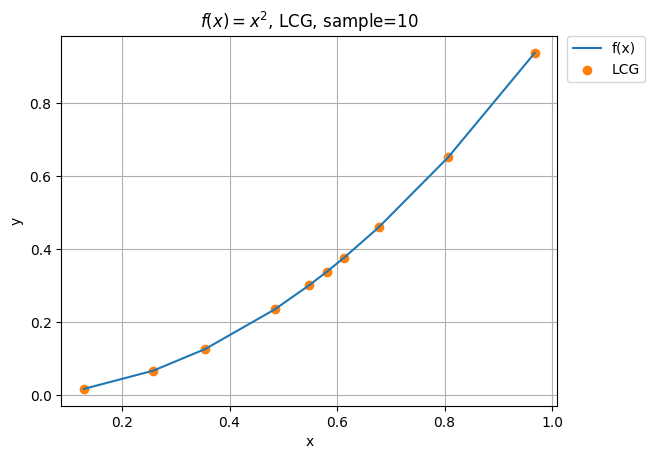

In [8]:
import matplotlib.pyplot as plt
import numpy as np

xs_lcg = [ixu[2] for ixu in ixus if ixu[0] < sample_size]
ys_lcg = [f(x) for x in xs_lcg]
xs = xs_lcg.copy()
xs.sort()
ys = [f(x) for x in xs]

# plot, set data
plt.plot(xs,ys,c="C0",linestyle="-",label="f(x)")
plt.scatter(xs_lcg,ys_lcg,c="C1",label="LCG")

# plot, set style
plt.grid()
s_title = f"$f(x) = x^2$, LCG, sample={sample_size}"
plt.title(s_title)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("y")
plt.xlabel("x")

# plot, show
plt.show()

In [9]:
sample_size = 30
ixus = rng(seed=3,period=30,a=13,b=0,sample=sample_size)

sum = 0
for ixu in ixus:
  sum += f(ixu[2])
print(f"\nsample = {sample_size} pts: {sum/sample_size}")



sample = 30 pts: 0.3279569892473118


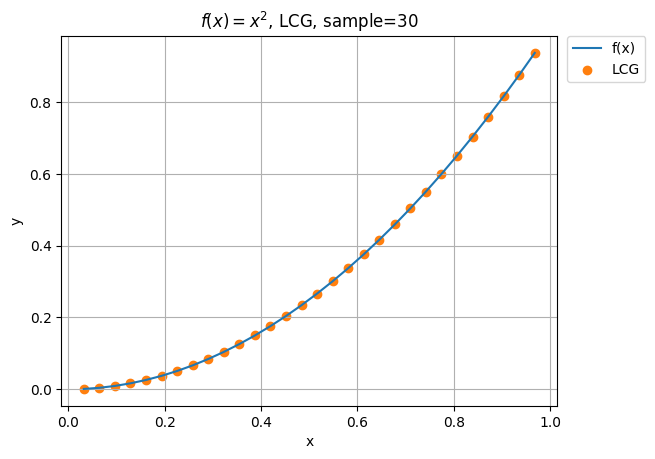

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xs_lcg = [ixu[2] for ixu in ixus if ixu[0] < sample_size]
ys_lcg = [f(x) for x in xs_lcg]
xs = xs_lcg.copy()
xs.sort()
ys = [f(x) for x in xs]

# plot, set data
plt.plot(xs,ys,c="C0",linestyle="-",label="f(x)")
plt.scatter(xs_lcg,ys_lcg,c="C1",label="LCG")

# plot, set style
plt.grid()
s_title = f"$f(x) = x^2$, LCG, sample={sample_size}"
plt.title(s_title)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("y")
plt.xlabel("x")

# plot, show
plt.show()

##### <b>minimal standard RNG</b>


\begin{align}
  x_i &= ax_{i-1} \\
  u_i &= \frac{x_i \text{ mod } m}{m},
\end{align}
</br>

where $m=2^{31}-1,a=7^5 = 16807, b=0$.
</br>


##### example 02


find the area of a set of points $(x,y)$ that satisfy
</br></br>

$$4(2x-1)^4 + 8(2y-1)^8 < 1 + 2(2y-1)^3(3x-2)^2.$$
</br></br>

this is also a monte carlo problem but instead of using the average of continuous $f(x) = x^2$, here average applies to a discontinuous, [characteristic function](https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)). ie, where "1" (true) applies to $(x,y)$ that belong to the set and "0" (false) to those that do not.
</br>


###### code


rng: 3.391501 seconds
use: 0.016055 seconds

sample = 10000 sets: 5476 ok, 4524 not ok



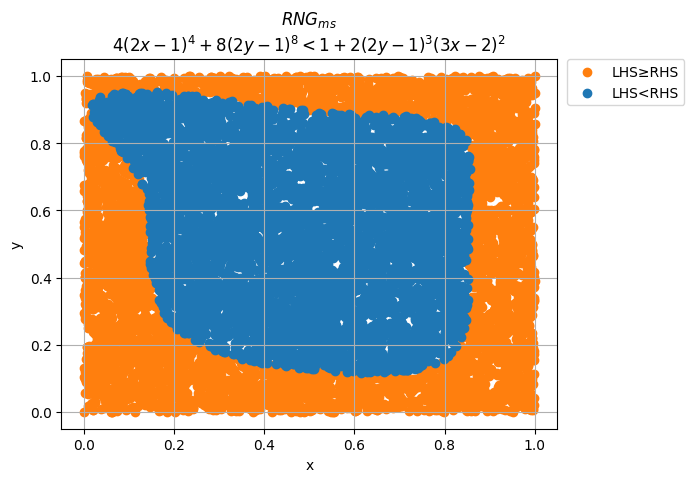

In [11]:
import time
import matplotlib.pyplot as plt

lhs = lambda x,y: 4*pow(2*x-1,4) + 8*pow(2*y-1,8)
rhs = lambda x,y: 1 + 2*pow(2*y-1,3)*pow(3*x-2,2)

# make a proper class, oi # class MinStd or something
ms_PERIOD = pow(2,31) - 2 # bc m = p + 1
ms_MULTIPLIER = pow(7,5)

def minstd(seed=1,sample=0):
  return rng(seed=seed,period=ms_PERIOD,a=ms_MULTIPLIER,b=0,sample=sample)

def main():
  time0 = time.time()

  sample_size = 10000 # number of (x,y) pairs
  nsets = 2
  ixys = minstd(seed=1,sample=sample_size*nsets)

  time1 = time.time()
  print(f"rng: {time1 - time0:.6f} seconds")

  xs_yah,ys_yah = [],[]
  xs_nah,ys_nah = [],[]
  for i in range(0,len(ixys),nsets):
    x = ixys[i][2]
    y = ixys[i+1][2]
    if lhs(x,y) < rhs(x,y):
      xs_yah.append(x)
      ys_yah.append(y)
    else:
      xs_nah.append(x)
      ys_nah.append(y)

  time2 = time.time()
  print(f"use: {time2 - time1:.6f} seconds")
  print(f"\nsample = {sample_size} sets: {len(xs_yah)} ok, {len(xs_nah)} not ok\n")

  # plot, set data
  plt.scatter(xs_nah,ys_nah,c="C1",label="LHS≥RHS") # LHS$\ge$RHS
  plt.scatter(xs_yah,ys_yah,c="C0",label="LHS<RHS")

  # plot, set style
  plt.grid()
  plt.title("$RNG_{ms}$\n$4(2x-1)^4 + 8(2y-1)^8 < 1 + 2(2y-1)^3(3x-2)^2$")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("y")
  plt.xlabel("x")

  # plot, show
  plt.show()

if __name__ == "__main__":
  main()


##### <b>randu generator</b>.


\begin{align}
  x_i &= ax_{i-1} \\
  u_i &= \frac{x_i \text{ mod } m}{m},
\end{align}
</br>

where $a=65539 = 2^{16} + 3,m=2^{31}$.
</br></br>

this is a bad RNG bc $u_i$ is noticeably related to $u_{i-1},u_{i-2}$. ie,
</br></br>

\begin{align}
  a^2 - 6a &= (2^{16} + 3)^2 - 6(2^{16} + 3) \\
  &= 2^{32} + 6\cdot 2^{16} + 9 - 6\cdot 2^{16} - 18 \\
  &= 2^{32} - 9 \\
  \\
  &\Downarrow \\
  \\
  a^2 - 6a + 9 &= 0 \text{ (mod }m) \\
  \\
  &\Downarrow \\
  \\
  x_{i+2} - 6x_{i+1} + 9x_i &= a^2 x_i - 6ax_i + 9x_i \text{ (mod }m) \\
  &= 0 \text{ (mod }m) \\
  \\
  &\Downarrow \\
  \\
  u_{i+2} &= 6u_{i+1} - 9u_i \text{ (mod }1).
\end{align}
</br>


###### code


In [ ]:
import time
import matplotlib.pyplot as plt

# make a proper class, oi # class MinStd or something
ru_PERIOD = pow(2,31) - 1 # m = p + 1
ru_MULTIPLIER = pow(2,16) + 3

def randu(seed=1,sample=0):
  return rng(seed=seed,period=ru_PERIOD,a=ru_MULTIPLIER,b=0,sample=sample)

time0 = time.time()

sample_size = 10000 # number of (x,y) pairs
nsets = 3 # number vars ~ [x,y,z]
imss = minstd(seed=1,sample=sample_size*nsets)
irus = randu(seed=1,sample=sample_size*nsets)

time1 = time.time()
print(f"rng: {time1 - time0:.6f} seconds")

xs_ms,ys_ms,zs_ms = [],[],[]
xs_ru,ys_ru,zs_ru = [],[],[]
for i in range(sample_size):
  xs_ms.append(imss[i*nsets][2])
  ys_ms.append(imss[i*nsets+1][2])
  zs_ms.append(imss[i*nsets+2][2])
  xs_ru.append(irus[i*nsets][2])
  ys_ru.append(irus[i*nsets+1][2])
  zs_ru.append(irus[i*nsets+2][2])

time2 = time.time()
print(f"use: {time2 - time1:.6f} seconds")
print(f"\nsample = {sample_size} sets = {sample_size*nsets} points\n")

plt.title("$randu, 3d \\rightarrow 2d$")
plt.scatter(xs_ru,ys_ru,zs_ru,c="C1",label="randu")
plt.show()
plt.title("#min std, 3d \\rightarrow 2d$")
plt.scatter(xs_ms,ys_ms,zs_ms,c="C0",label="min std")
plt.show()

# plot, set data
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(xs_ru,ys_ru,zs_ru,c="C1",label="randu",marker=".",s=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(xs_ms,ys_ms,zs_ms,c="C0",label="std min",marker=".",s=1)

# plot, set style
plt.grid()
#plt.title("RNG: randu vs min std")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_zlabel("z")
ax.set_ylabel("y")
ax.set_xlabel("x")

# plot, show
plt.show()


###### 3d image, alt


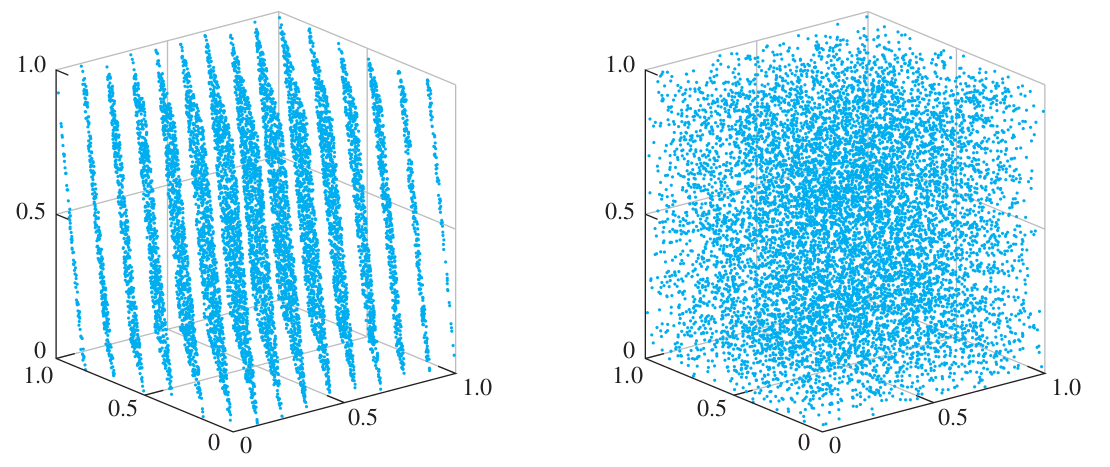

##### example 03


use randu to approximate the volume of ball of radius $0.04$ centered at $(\frac{1}{3},\frac{1}{3},\frac{1}{2})$.
</br>


###### code


In [ ]:
import math

# problem specs
plane1 = lambda x,y,z: 9*x - 6*y + z - 1
plane2 = lambda x,y,z: 9*x - 6*y + z - 2
z1 = lambda x,y: 1 - 9*x + 6*y
z2 = lambda x,y: 2 - 9*x + 6*y
r = 0.04
origin = [1./3,1./3,1./2]

# get random numbers
sample_size = 10000 # number of (x,y) pairs
nsets = 3 # number vars ~ [x,y,z]
irus = randu(seed=1,sample=sample_size*nsets)

# scale random numbers to [x,y,z]
xs_yah,ys_yah,zs_yah = [],[],[]
xs_nah,ys_nah,zs_nah = [],[],[]
for i in range(sample_size):
  x = origin[0] + r*irus[i*nsets][2]
  y = origin[1] + r*irus[i*nsets+1][2]
  z = origin[2] + r*irus[i*nsets+1][2]
  if (math.sqrt(pow(x,2)+pow(y,2)+pow(z,2))) > r:
    xs_nah.append(x)
    ys_nah.append(y)
    zs_nah.append(z)
  else:
    xs_yah.append(x)
    ys_yah.append(y)
    zs_yah.append(z)

print(f"\nsample = {sample_size} sets: {len(xs_yah)} ok, {len(xs_nah)} not ok\n")


In [ ]:
from itertools import product,combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# draw cube
r = 0.04
sq = [-r,r]
for s,e in combinations(np.array(list(product(sq,sq,sq))),2):
  if np.sum(np.abs(s-e)) == sq[1]-sq[0]:
    a = [origin[0]+s[0],origin[1]+s[1],origin[2]+s[2]]
    b = [origin[0]+e[0],origin[1]+e[1],origin[2]+e[2]]
    ax.plot3D(*zip(a,b),color="b",linestyle="--",linewidth=1)

# draw sphere
u = np.linspace(0,2*np.pi,100)
v = np.linspace(0,np.pi,100)
x = origin[0]+r*np.outer(np.cos(u),np.sin(v))
y = origin[1]+r*np.outer(np.sin(u),np.sin(v))
z = origin[2]+r*np.outer(np.ones(np.size(u)),np.cos(v))
#ax.plot_wireframe(x,y,z,color="linen")
ax.plot_surface(x,y,z,color='linen',alpha=0.5)

# draw a point
ax.scatter(origin[0],origin[1],origin[2],color="b",s=50)

# draw planes
xs_p1 = [0,.5]
ys_p1 = [0,.5]
xs_1,ys_1 = np.meshgrid(xs_p1,ys_p1)
zs_1 = z1(xs_1,ys_1)
xs_p2 = [0,.5]
ys_p2 = [0,.5]
xs_2,ys_2 = np.meshgrid(xs_p2,ys_p2)
zs_2 = z2(xs_2,ys_2)
ax.plot_surface(xs_1,ys_1,zs_1,alpha=0.4)
ax.plot_surface(xs_2,ys_2,zs_2,alpha=0.2)
ax.set_xlim(origin[0] - r*2,0.6) #origin[0] + r*2)
ax.set_ylim(origin[1] - r*2,0.6) #origin[1] + r*2)
ax.set_zlim(origin[2] - r*2,0.6+1./6) #origin[2] + r*2)

# draw data
ax.scatter(xs_yah,ys_yah,zs_yah,c="C0",label="std min",marker=".",s=1)
ax.scatter(xs_nah,ys_nah,zs_nah,c="C1",label="std min",marker=".",s=1)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.grid()

plt.show()
